In [33]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

import seaborn as sns
sns.set_context('notebook')
sns.set(style="whitegrid", font_scale=1.5)
sns.despine()
sns.set_color_codes()

import matplotlib.pyplot as plt
#plt.xlim(0, 1)
#plt.ylim(0, None)
from matplotlib.ticker import MaxNLocator
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titleweight'] = 3

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import logging
logging.basicConfig(level=logging.INFO, stream=sys.stdout)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(40, 140)

(0, 18)

Text(0, 0.5, 'Age (mois)')

Text(0.5, 0, 'Patients')

Text(0.5, 1.0, 'MAR')

([<matplotlib.axis.XTick at 0x1282929e8>,
 <a list of 27 Text xticklabel objects>)

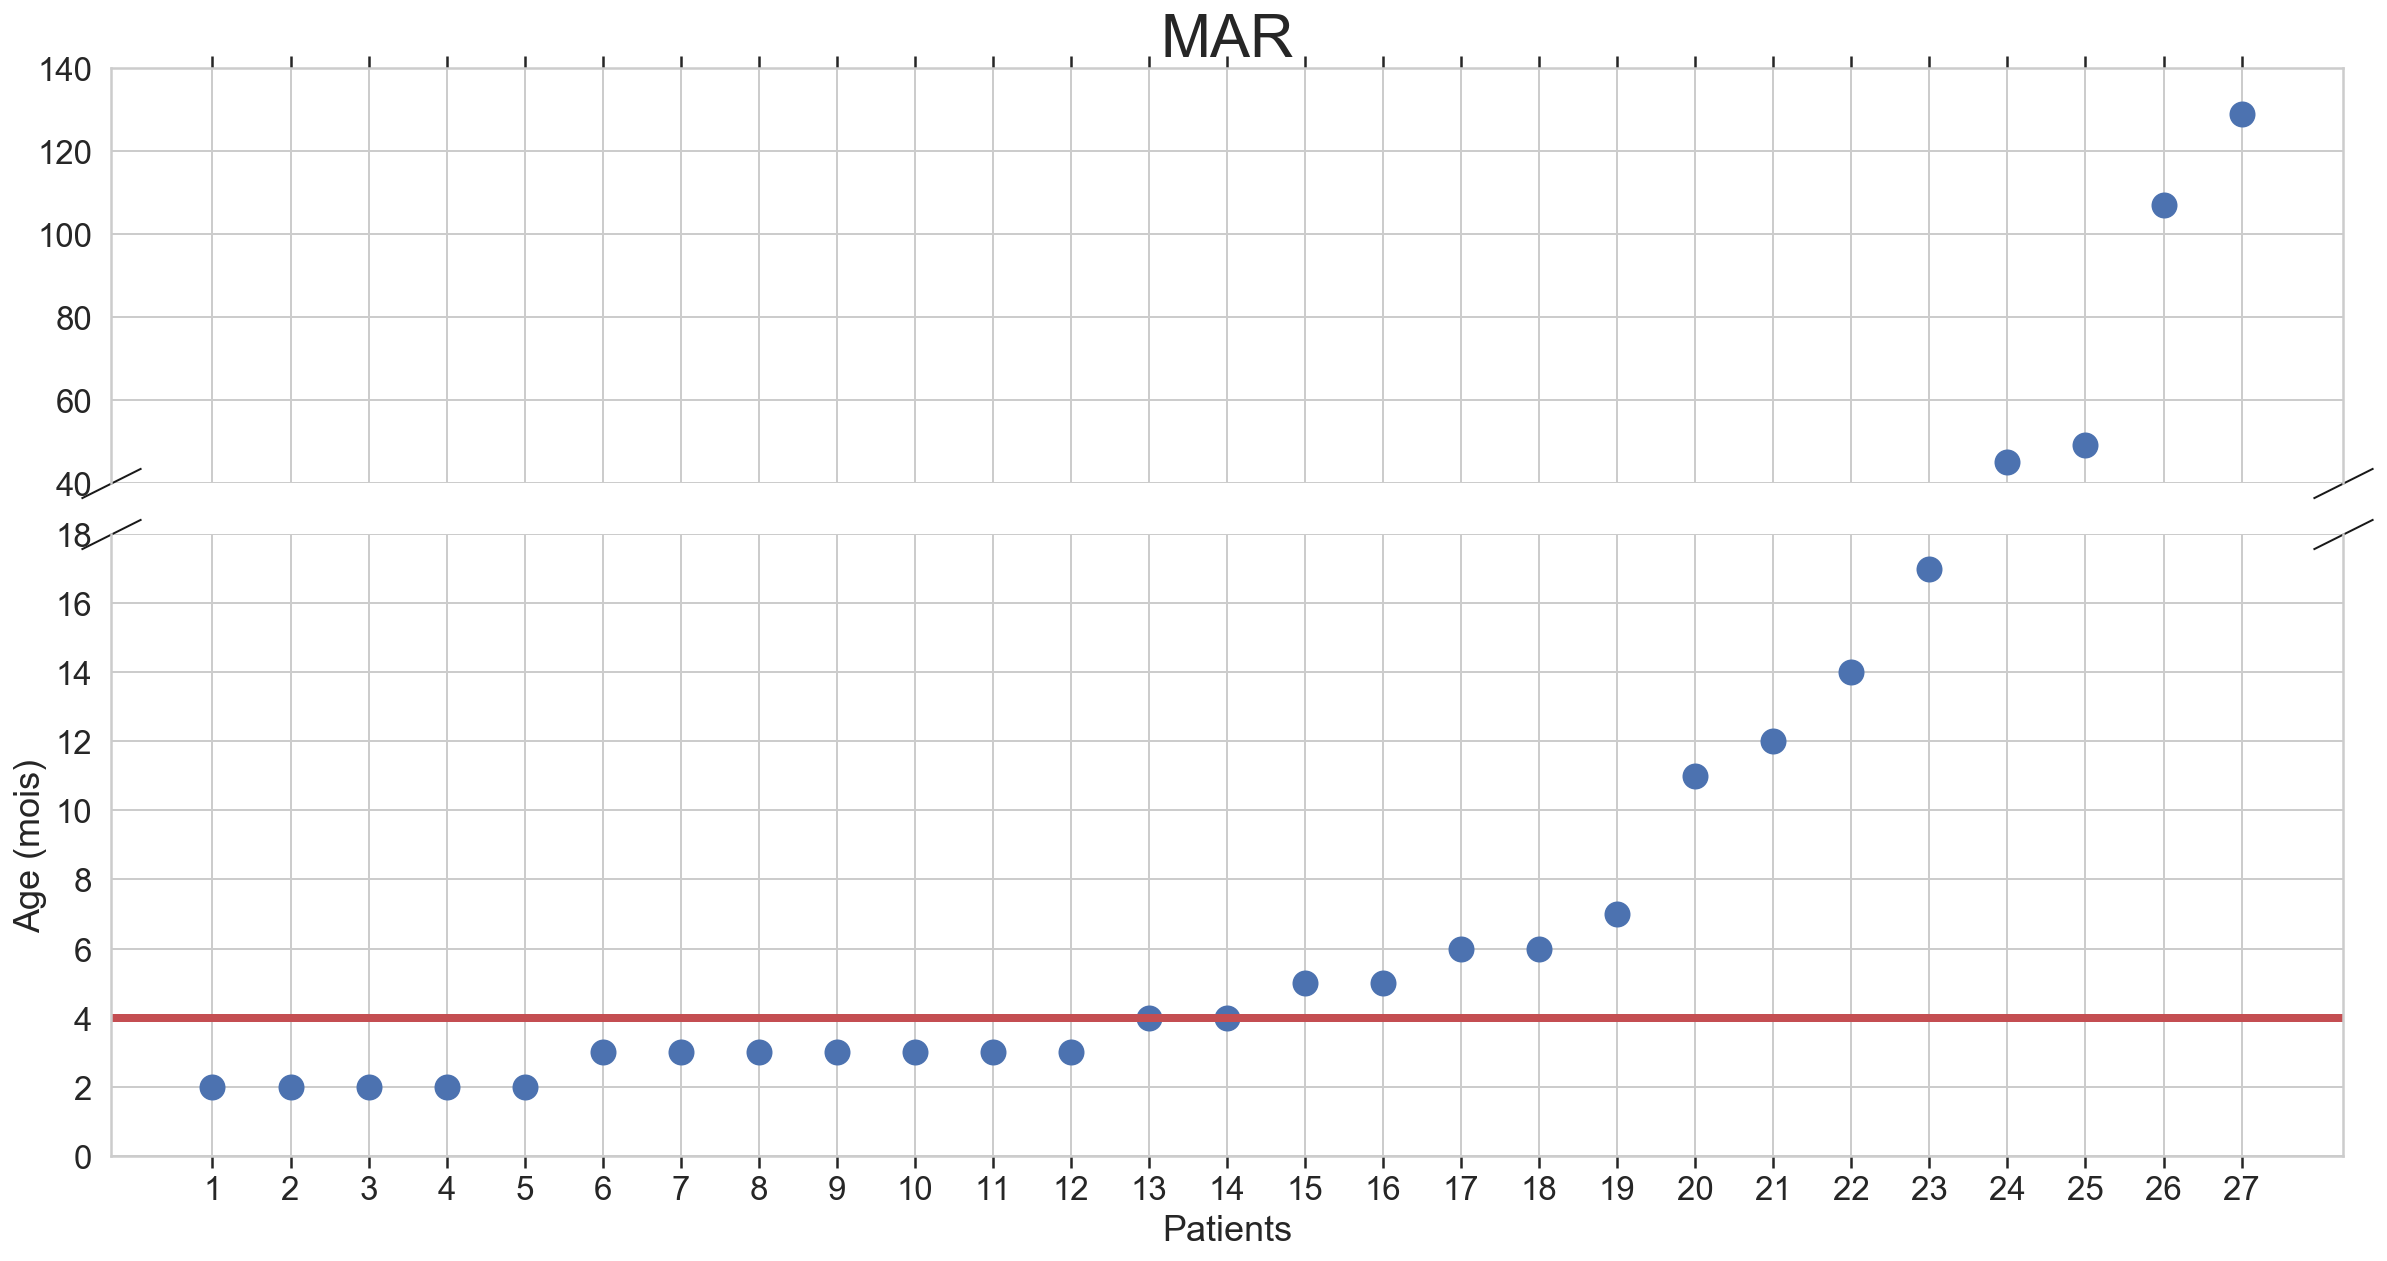

In [73]:
np.random.seed(19680801)

pts = sorted([3, 3, 12, 2, 2, 3, 2, 7, 49, 2, 11, 4, 45, 5, 129, 14, 3, 107, 3, 3, 17, 2, 6, 4, 5, 3, 6])
# Now let's make two outlier points which are far away from everything.


# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 3]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

# plot the same data on both axes
ax1.plot(pts, 'bo', markersize=12)
ax2.plot(pts, 'bo', markersize=12)

plt.axhline(y=np.median(pts), linewidth=4, color='r')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(40, 140)  # outliers only
ax2.set_ylim(0, 18)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=30,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_ylabel('Age (mois)')
ax2.set_xlabel('Patients')
ax1.set_title('MAR',
             fontdict = {'fontsize': plt.rcParams['axes.titlesize'],
                         'fontweight' : plt.rcParams['axes.titleweight']})

plt.xticks(np.arange(len(pts)), np.arange(1, len(pts)+1))

#plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

(0, 18)

Text(0, 0.5, 'Age (mois)')

Text(0.5, 0, 'Patients')

Text(0.5, 1.0, 'MAR Avec Anomalie')

([<matplotlib.axis.XTick at 0x1273d4550>,
 <a list of 27 Text xticklabel objects>)

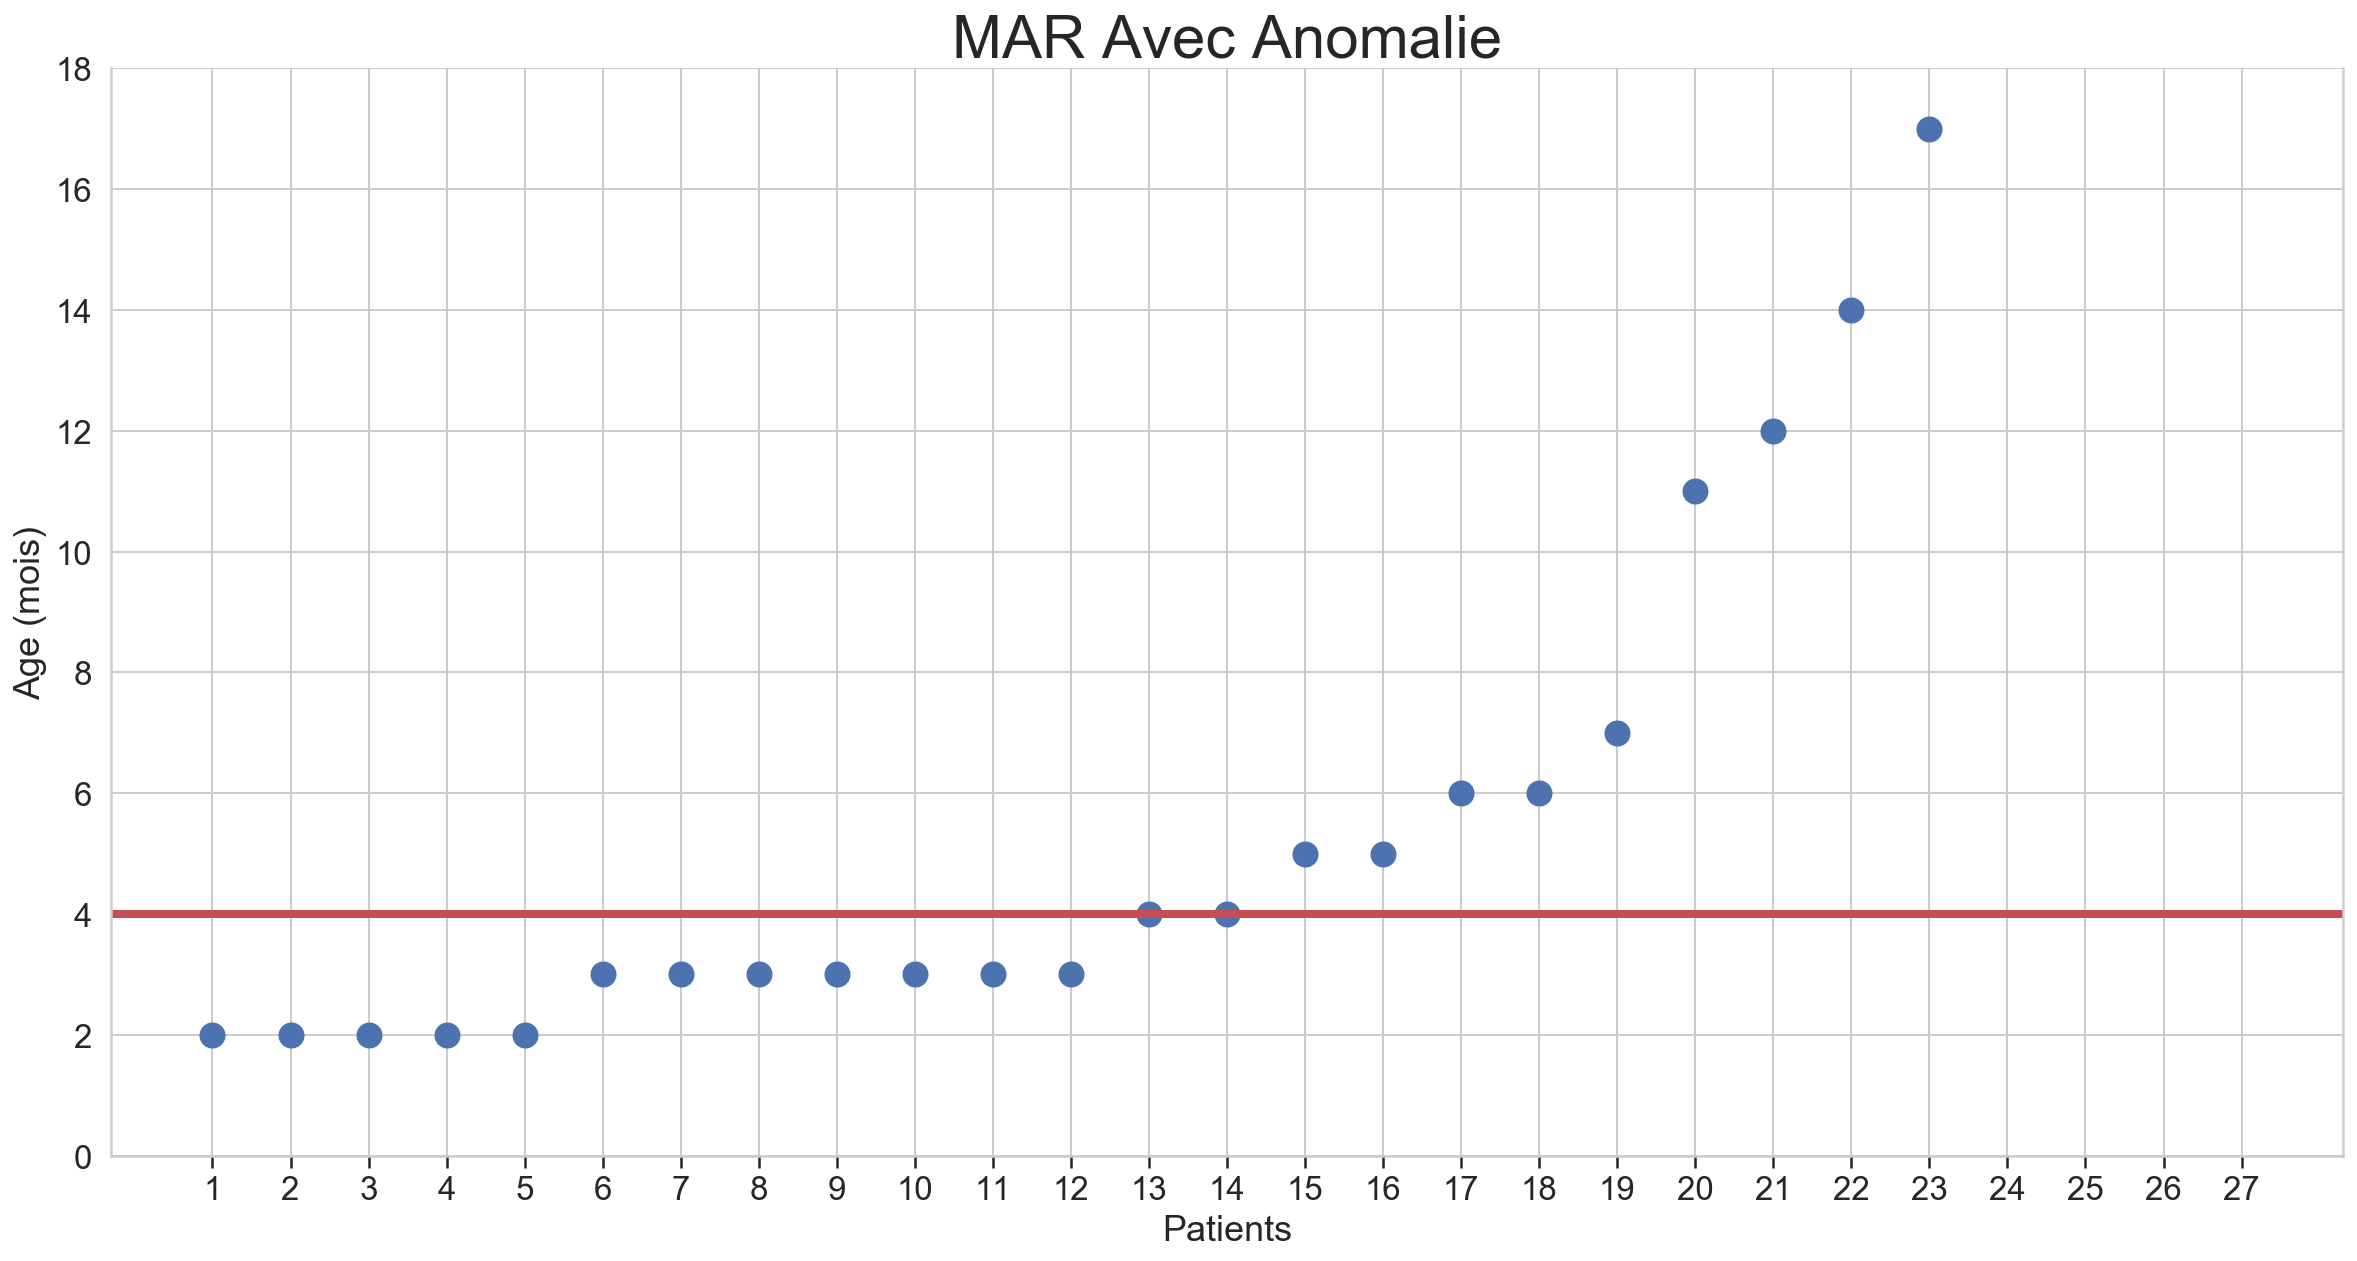

In [65]:
#### NO SPLIT

np.random.seed(19680801)

pts = [3, 3, 3, 4, 6, 7, 11, 14, 17]
# Now let's make two outlier points which are far away from everything.


# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, ax2 = plt.subplots(1, 1, sharex=True)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

# plot the same data on both axes
ax2.plot(pts, 'bo', markersize=12)

plt.axhline(y=np.median(pts), linewidth=4, color='r')

# zoom-in / limit the view to different portions of the data
ax2.set_ylim(0, 18)  # most of the data

# hide the spines between ax and ax2
ax2.spines['top'].set_visible(False)
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.


ax2.set_ylabel('Age (mois)')
ax2.set_xlabel('Patients')
ax2.set_title('MAR Avec Anomalie',
             fontdict = {'fontsize': plt.rcParams['axes.titlesize'],
                         'fontweight' : plt.rcParams['axes.titleweight']})

plt.xticks(np.arange(len(pts)), np.arange(1, len(pts)+1))

plt.show()